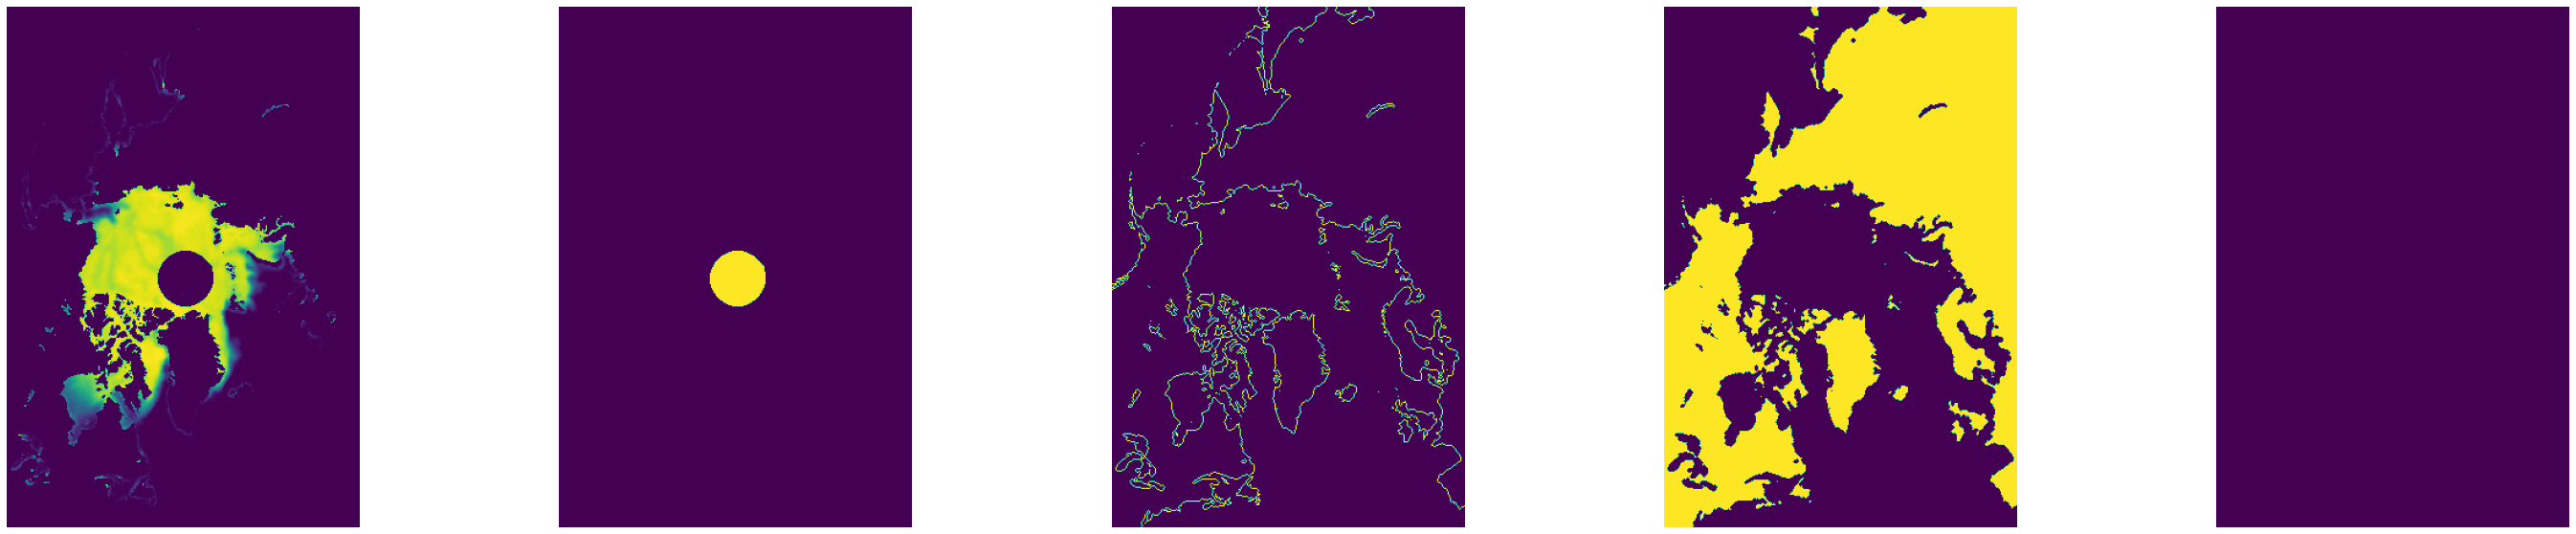

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

loaded = np.load('./data/train/197811.npy')
pltsize = 10
plt.figure(figsize=(5 * pltsize, pltsize))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.axis('off')
    plt.imshow(loaded[:,:,i])
